<a href="https://colab.research.google.com/github/ErikaCibellySx24/SectoralEmissionsAnalysis/blob/main/SectoralEmissionsAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise de dados da emissão de CO2 no Brasil

## 1º etapa: extração dos dados

In [ ]:
# realizando importação dos pacotes que serão utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [ ]:
#realizando leitura do csv utilizado para obter os dados referentes a emissão de co2 por categoria

# url temporária enquanto site da SEEG está atualizando os dados
emissao_co2 = pd.read_csv("https://raw.githubusercontent.com/andrevcmelo/test/master/emissao_co2_brasil.csv", encoding="latin-1", sep=";")

## 2ª etapa: Transformação dos dados

In [ ]:
# verificando formato
emissao_co2.shape

(19, 50)

In [ ]:
# verificando as 5 primeiras linhas da nossa tabela
emissao_co2.head()

,Categoria,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Agricultura,19009740,18533743,20655431,20794861,21949714,22278086,22496768,24424471,24338238,...,53460890,56173063,61751635,59996909,63538088,65741523,64294209,68759433,71573622,70222653
1,Agricultura e/ou Agropecuária,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Agropecuária,3332108,3737844,4310490,5050807,5335352,5660269,6227105,6763432,6804973,...,937546118,978580658,914540828,787576188,990442005,815174932,911477831,927329882,833576914,862542076
3,Cimento,7760596,8399270,9595554,10963722,12213525,13351836,15661336,17048993,18494451,...,31849080,35446325,39553736,41340972,42395890,41809588,38184572,34886736,32287119,31420279
4,Comercial,688385,730951,804091,859027,913738,965083,1036875,1072597,1117604,...,1470669,1562350,1582966,1826969,1722452,1804074,1535757,1558829,1472672,1534689


In [ ]:
# transformando as colunas em linhas para facilitar a análise
dados = emissao_co2.melt(id_vars=["Categoria"], var_name = "Data", value_name = "Valor")\
.sort_values(by=["Categoria","Data"])\
.reset_index(drop=True)

In [ ]:
# listando colunas após a transformação
dados.columns.to_list()

['Categoria', 'Data', 'Valor']

In [ ]:
# realizando verificação das 5 primeiras e 5 últimas linhas
dados.head(1-2)

,Categoria,Data,Valor
0,Agricultura,1970,19009740
1,Agricultura,1971,18533743
2,Agricultura,1972,20655431
3,Agricultura,1973,20794861
4,Agricultura,1974,21949714
...,...,...,...
925,Uso de HFCs,2013,13578710
926,Uso de HFCs,2014,14480904
927,Uso de HFCs,2015,15383099
928,Uso de HFCs,2016,16285293


In [ ]:
# verificando se existem valores ausentes
dados.isna().sum()

Categoria    0
Data         0
Valor        0
dtype: int64

In [ ]:
#Verificando as categorias que possuem valor 0
categoria_sem_valores = dados[dados["Valor"]==0]
categoria_sem_valores.groupby("Categoria")["Data"].nunique()

Categoria
Agricultura e/ou Agropecuária    49
Conservação                      49
Não alocado                      20
Transporte                       49
Uso de HFCs                      20
Name: Data, dtype: int64

In [ ]:
# Contando o número de datas únicos por categoria e guardando no dataframe categoria_sem_valores.
categoria_sem_valores = categoria_sem_valores.groupby("Categoria")["Data"].nunique().reset_index()

In [ ]:
# visualização das categorias que apenas possuem valor 0
categoria_sem_valores.head()

,Categoria,Data
0,Agricultura e/ou Agropecuária,49
1,Conservação,49
2,Não alocado,20
3,Transporte,49
4,Uso de HFCs,20


In [ ]:
# criando nova lista contendo os valores da coluna "Categoria" do DataFrame categoria_sem_valores.
lista_cat = categoria_sem_valores["Categoria"].tolist()


In [ ]:
# removendo iterativamente, todas as linhas do DataFrame dados onde a coluna "Categoria" é igual a cada elemento da lista lista_cat.
for i in lista_cat:
  dados = dados[dados["Categoria"] != i]

In [ ]:
# verificando o formato após o tratamento anterior
dados.shape

(686, 3)

In [ ]:
# renomeando a coluna "Data" para "Ano"
dados.rename(columns={"Data": "Ano"}, inplace=True)

In [ ]:
# verificando informações sobre a tabela
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 686 entries, 0 to 881
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Categoria  686 non-null    object
 1   Ano        686 non-null    object
 2   Valor      686 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 21.4+ KB


In [ ]:
# verificando as categorias presentes na tabela
dados.groupby("Categoria")["Ano"].nunique()

Categoria
Agricultura                 49
Agropecuária                49
Cimento                     49
Comercial                   49
Energia Elétrica            49
Metalurgia                  49
Outras Industrias           49
Pecuária                    49
Produção de Combustíveis    49
Público                     49
Residencial                 49
Saneamento Básico           49
Transporte de Carga         49
Transporte de Passageiro    49
Name: Ano, dtype: int64

In [ ]:
# Validando que não existem categorias onde todos os anos estão com valor 0
categoria_sem_valores = dados[dados["Valor"]==0]
categoria_sem_valores.groupby("Categoria")["Ano"].nunique()

Series([], Name: Ano, dtype: int64)

## 3ª etapa: Apresentação dos dados

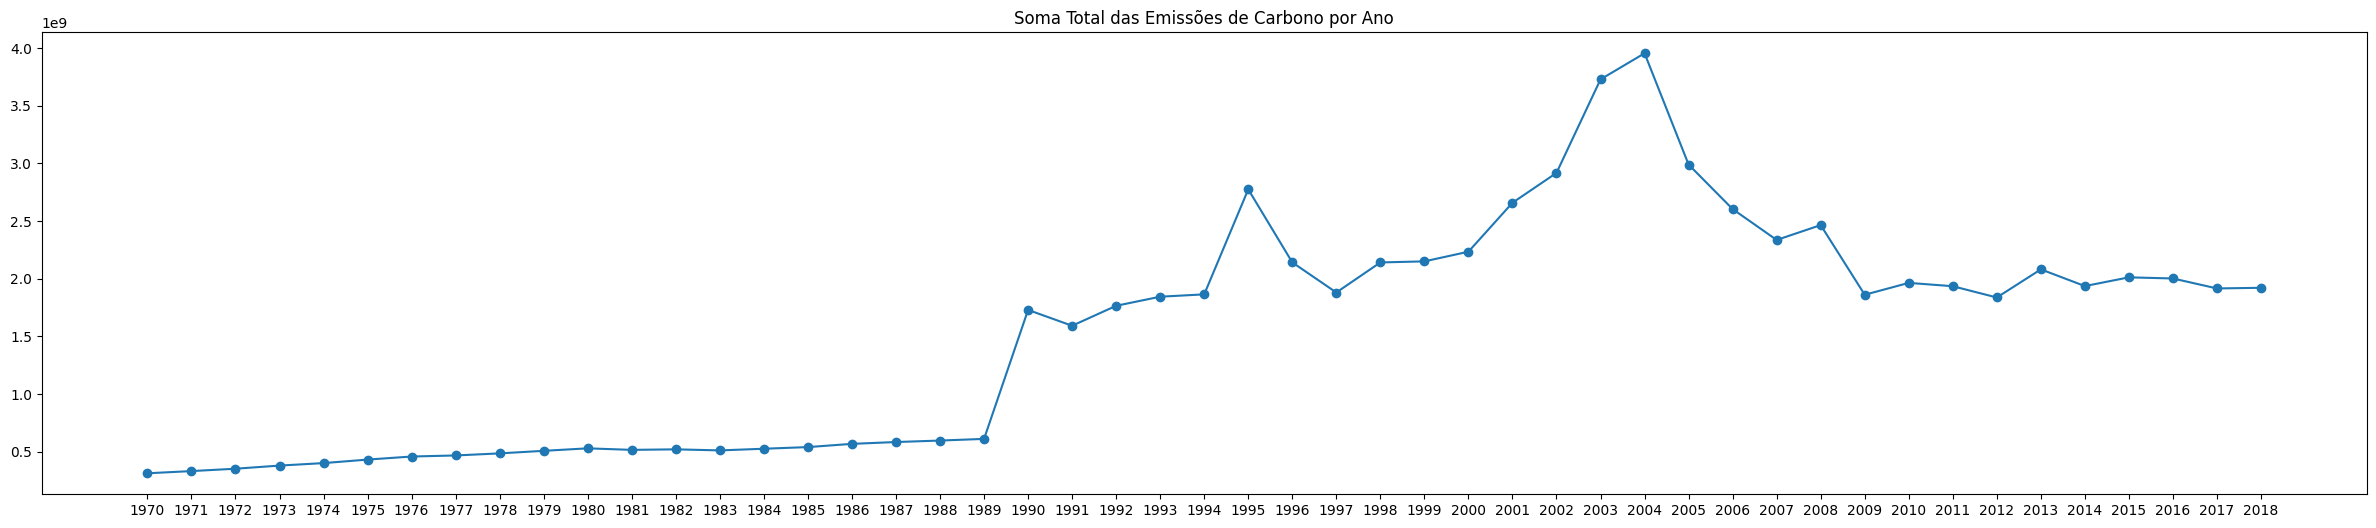

In [ ]:
soma_total_por_ano = dados.groupby("Ano")["Valor"].sum().reset_index()

plt.figure(figsize=(30, 6))
plt.plot(soma_total_por_ano["Ano"], soma_total_por_ano["Valor"], marker="o")
plt.title("Soma Total das Emissões de Carbono por Ano")
plt.show()

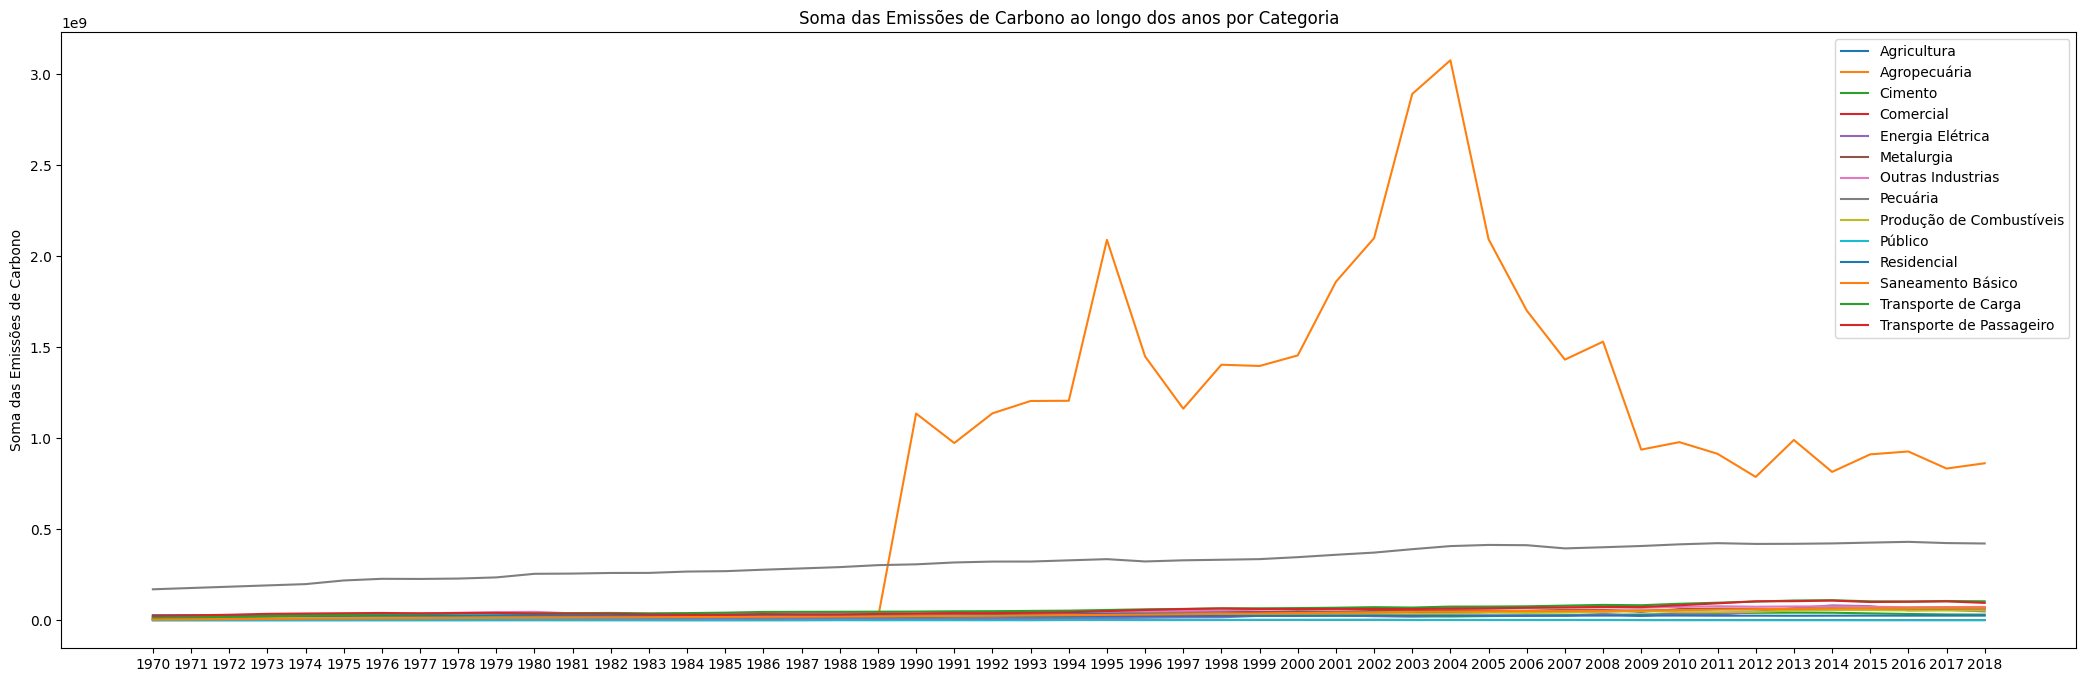

In [ ]:
soma_por_categoria = dados.groupby(["Categoria", "Ano"])["Valor"].sum().reset_index()

plt.figure(figsize=(26, 8))
for categoria in soma_por_categoria["Categoria"].unique():
    dados_categoria = soma_por_categoria[soma_por_categoria["Categoria"] == categoria]
    plt.plot(dados_categoria["Ano"], dados_categoria["Valor"], label=categoria)

plt.title("Soma das Emissões de Carbono ao longo dos anos por Categoria")
plt.ylabel("Soma das Emissões de Carbono")
plt.legend()
plt.show()

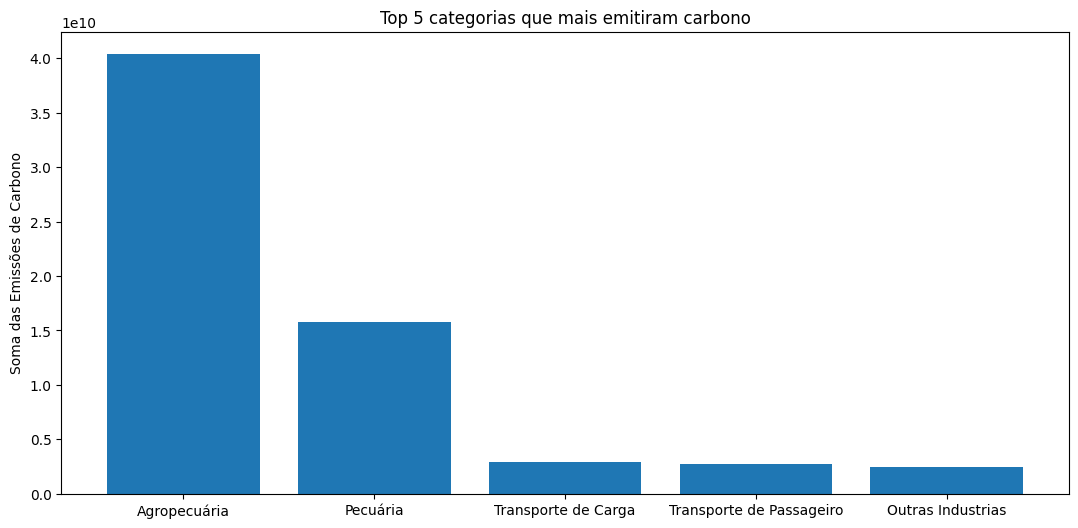

In [ ]:
dados_agrupados_por_categoria = dados.groupby("Categoria")["Valor"].sum().reset_index()

dados_agrupados_por_categoria = dados_agrupados_por_categoria.sort_values(by="Valor", ascending=False)

top_categorias = dados_agrupados_por_categoria.head(5)

plt.figure(figsize=(13, 6))
plt.bar(top_categorias["Categoria"], top_categorias["Valor"])
plt.title("Top 5 categorias que mais emitiram carbono")
plt.ylabel("Soma das Emissões de Carbono")
plt.show()

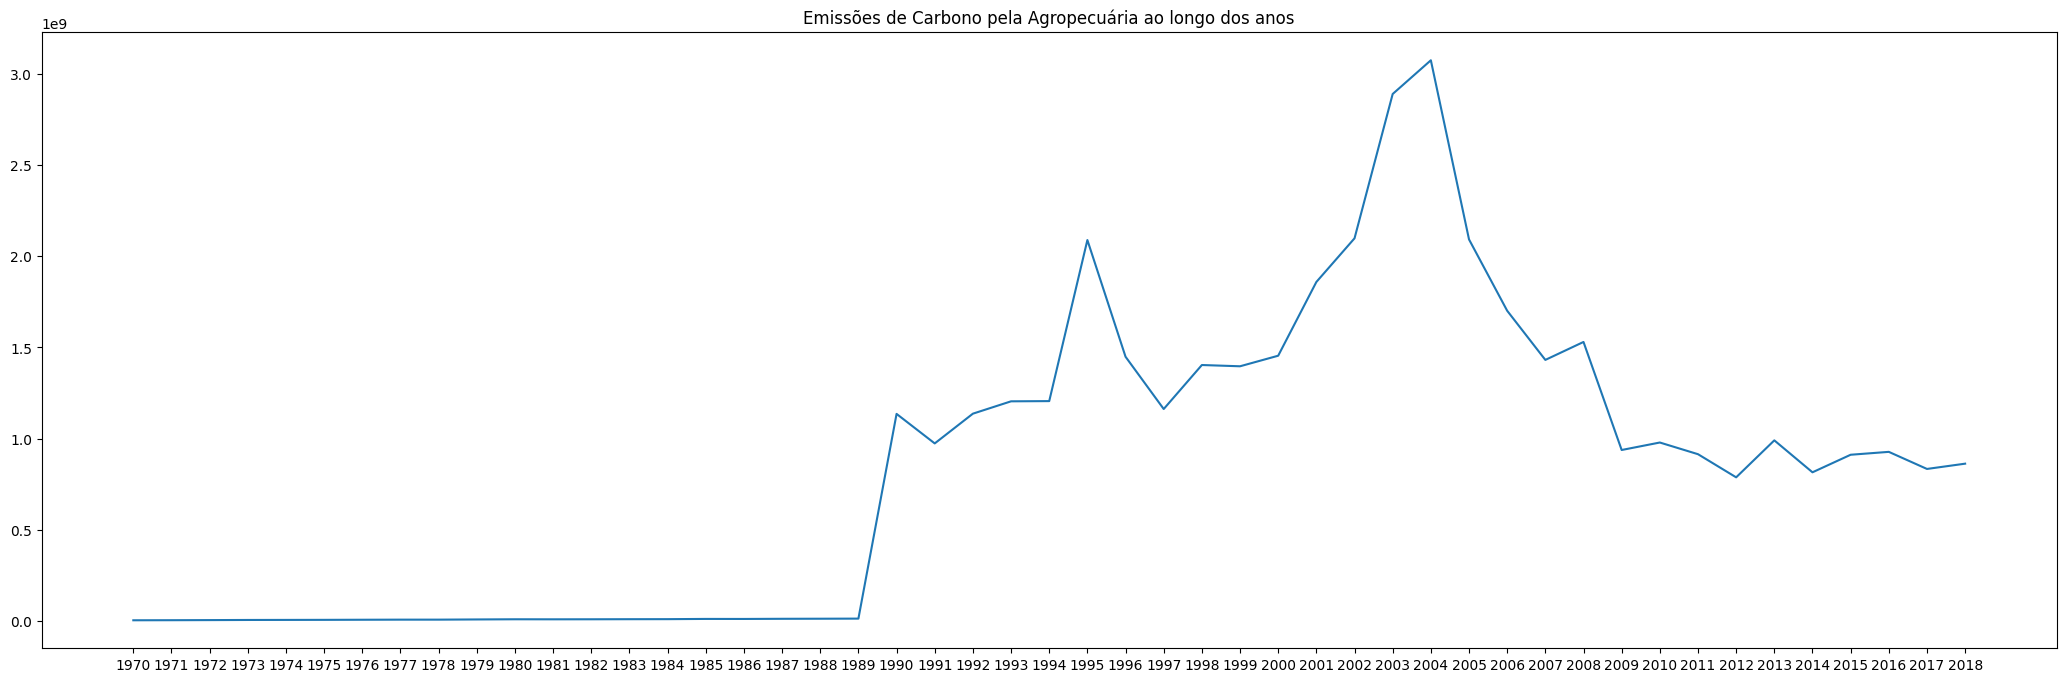

In [ ]:
#Gráfico de Linhas verificando a categoria Agropecuária ao Longo dos Anos
dados_categoria = dados[dados["Categoria"] == "Agropecuária"]
plt.figure(figsize=(26, 8))
plt.plot(dados_categoria["Ano"], dados_categoria["Valor"])
plt.title("Emissões de Carbono pela Agropecuária ao longo dos anos")
plt.show()


## Plus: análise dos dados fornecidos pela Climate Watch em relação a emissão de gases em geral por setores

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
emissao = pd.read_csv("/content/drive/MyDrive/data-science/historical_emissions_brasil.csv", sep=",")

In [ ]:
emissao.head(1-2)

In [ ]:
emissao.shape

In [ ]:
emissao.columns.to_list()

In [ ]:
emissao = emissao[["Sector", "2016", "2015", "2014", "2013", "2012", "2011", "2010", "2009", "2008", "2007", "2006", "2005", "2004",
                    "2003", "2002", "2001", "2000", "1999", "1998", "1997", "1996", "1995", "1994", "1993", "1992", "1991"]]

In [ ]:
# transformando as colunas em linhas para facilitar a análise
emissao_data = emissao.melt(id_vars=["Sector"], var_name = "Ano", value_name = "Valor")\
.sort_values(by=["Sector","Ano"])\
.reset_index(drop=True)

In [ ]:
emissao_data.head(1-2)

In [ ]:
# verificando setores presentes na análise
emissao_data["Sector"].unique()

In [ ]:
# realizando renomeação dos valores
emissao_data["Sector"] = emissao_data["Sector"].replace({"Agriculture": "Agricultura", "Energy": "Energia","Industrial Processes": "Processos Industriais",
                                                       "Land-Use Change and Forestry": "Mudança no Uso do Solo e Silvicultura",
                                                        "Total GHG emissions excluding LULUCF/LUCF": "Total de Emissão de Gases Excluindo LULUCF/LUCF",
                                                       "Total GHG emissions including LULUCF/LUCF": "Total de Emissão de Gases Incluindo LULUCF/LUCF", "Waste": "Desperdício"})

In [ ]:
# renomeando coluna
emissao_data.rename(columns={'Sector': 'Setor'}, inplace=True)

In [ ]:
# listando colunas
emissao_data.columns.to_list()

In [ ]:
# verificando 5 primeiras e 5 últimas linhas
emissao_data.head(1-2)

In [ ]:
#Verificando se existem setores com valor igual a 0
setor_sem_valores = emissao_data[emissao_data["Valor"]==0]
setor_sem_valores.groupby("Setor")["Ano"].nunique()

## Apresentação dos dados

In [ ]:
soma_total_por_ano = emissao_data.groupby("Ano")["Valor"].sum().reset_index()

plt.figure(figsize=(30, 6))
plt.plot(soma_total_por_ano["Ano"], soma_total_por_ano["Valor"], marker="o")
plt.title("Soma Total das Emissões por Ano")
plt.show()

In [ ]:
soma_por_setor = emissao_data.groupby(["Setor", "Ano"])["Valor"].sum().reset_index()

plt.figure(figsize=(26, 8))
for setor in soma_por_setor["Setor"].unique():
    dados_setor = soma_por_setor[soma_por_setor["Setor"] == setor]
    plt.plot(dados_setor["Ano"], dados_setor["Valor"], label=setor)

plt.title("Soma das Emissões ao longo dos anos por Setor")
plt.xlabel("Ano")
plt.ylabel("Soma das Emissões de Carbono")
plt.legend()
plt.show()

In [ ]:
dados_agrupados_por_setor = emissao_data.groupby("Setor")["Valor"].sum().reset_index()

dados_agrupados_por_setor = dados_agrupados_por_setor.sort_values(by="Valor", ascending=False)

top_setor = dados_agrupados_por_setor.head(5)

plt.figure(figsize=(30, 6))
plt.bar(top_setor["Setor"], top_setor["Valor"])
plt.title("Top 5 setores que mais realizaram emissões de gases")
plt.xlabel("Setor")
plt.ylabel("Soma das Emissões de Carbono")
plt.show()